<a href="https://colab.research.google.com/github/devpatel0005/Heart-Disease-prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/devpatel0005/Heart-Disease-prediction/refs/heads/main/heart_disease_uci%20-%20heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [5]:
df.drop_duplicates()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [7]:
df.drop(['slope','ca','thal'],axis=1,inplace=True)

In [8]:
num_cols=df.select_dtypes(include=['number']).columns
cat_cols=df.select_dtypes(include='object').columns

In [9]:
na_cols=['trestbps','chol','fbs','thalch','oldpeak']
cat_na_cols=['restecg','exang']
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan, strategy='median')
for i in na_cols:
  df[i] = si.fit_transform(df[[i]])

In [10]:
df['restecg']=df['restecg'].fillna(value=df['restecg'].mode()[0])
df['exang']=df['exang'].fillna(value=df['exang'].mode()[0])

/tmp/ipython-input-4230525163.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang']=df['exang'].fillna(value=df['exang'].mode()[0])


In [11]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


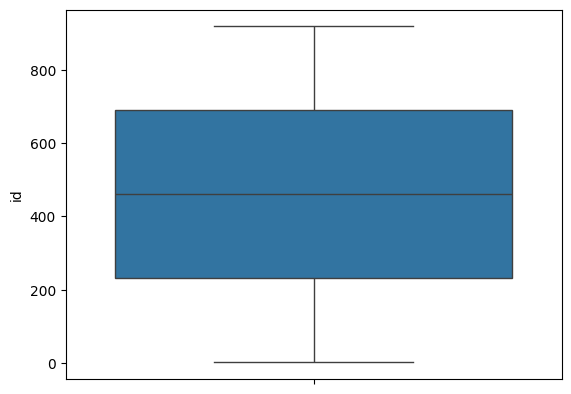

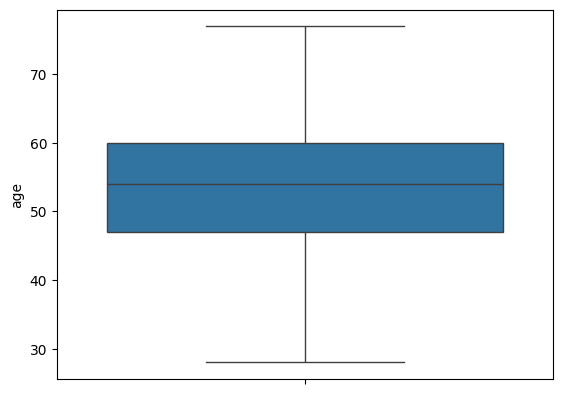

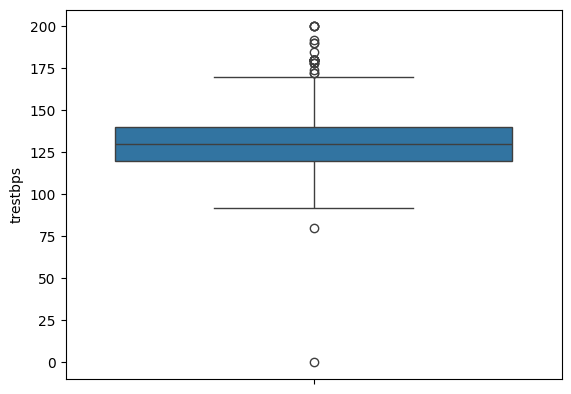

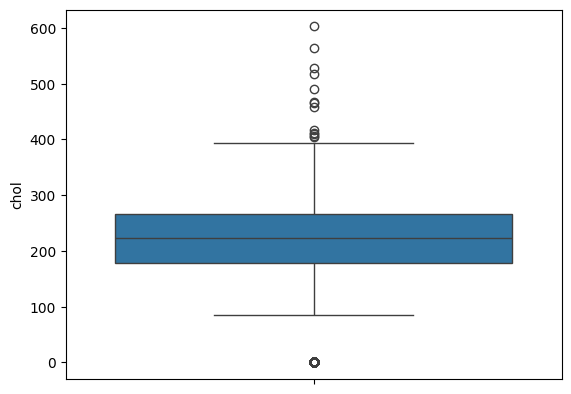

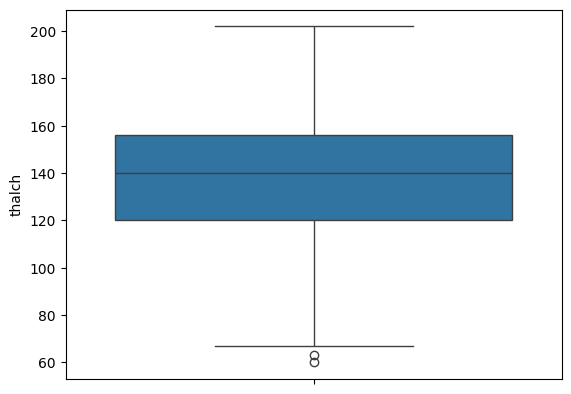

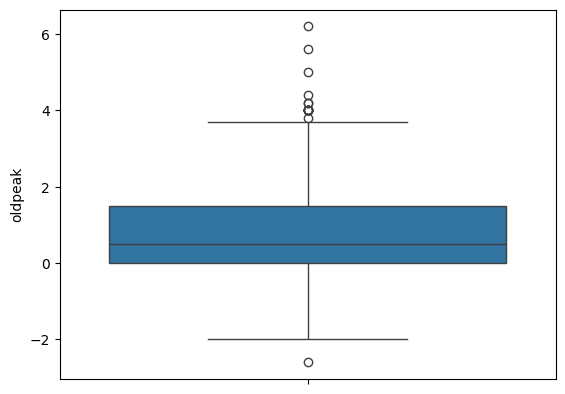

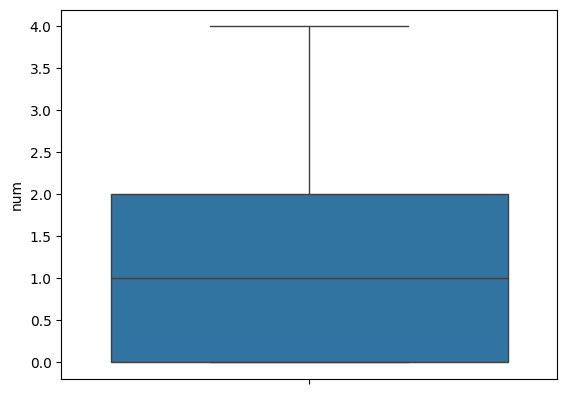

In [12]:
for i in num_cols:
  sns.boxplot(df[i])
  plt.show()

In [13]:
out_cols=['trestbps','chol','oldpeak']
def manage_out(df,col):
  for i in col:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lr=q1-1.5*iqr
    ur=q3+1.5*iqr
    df[i]=np.where(df[i]>ur,df[i].median(),df[i])
    df[i]=np.where(df[i]<lr,df[i].median(),df[i])
  return df
df=manage_out(df,out_cols)

In [14]:
for i in num_cols:
  print(i,df[i].skew())

id 0.0
age -0.195993861608106
trestbps 0.25604101340828445
chol 0.5924635568913226
thalch -0.2350174024294091
oldpeak 0.8918784189932046
num 0.9688800484130079


In [15]:
df['oldpeak']=np.sqrt(df['oldpeak'])

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

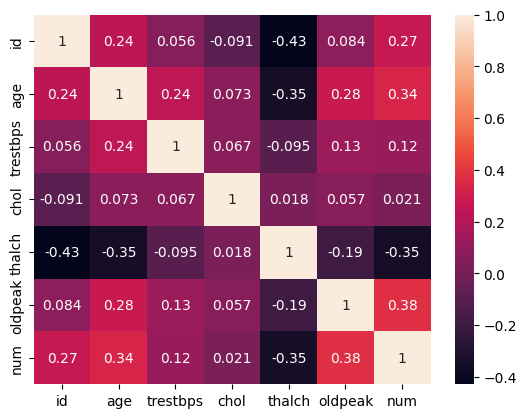

In [16]:
sns.heatmap(df[num_cols].corr(),annot=True)

In [17]:
df.drop('id',axis=1,inplace=True)

In [18]:
for i in cat_cols:
  print(df[i].value_counts())

sex
Male      726
Female    194
Name: count, dtype: int64
dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64
fbs
0.0    782
1.0    138
Name: count, dtype: int64
restecg
normal              553
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64
exang
False    583
True     337
Name: count, dtype: int64


In [19]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False)
oh=ohe.fit_transform(df[cat_cols])
ohe_df=pd.DataFrame(oh,columns=ohe.get_feature_names_out())
df=pd.concat([ohe_df,df.drop(cat_cols,axis=1)],axis=1)

In [20]:
df.head()

,sex_Female,sex_Male,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,...,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,age,trestbps,chol,thalch,oldpeak,num
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,63,145.0,233.0,150.0,1.516575,0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,67,160.0,286.0,108.0,1.224745,2
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,67,120.0,229.0,129.0,1.612452,1
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,37,130.0,250.0,187.0,1.870829,0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,41,130.0,204.0,172.0,1.183216,0


In [21]:
x=df.drop('num',axis=1)
y=df['num']

In [22]:
x.isnull().sum()

,0
sex_Female,0
sex_Male,0
dataset_Cleveland,0
dataset_Hungary,0
dataset_Switzerland,0
dataset_VA Long Beach,0
cp_asymptomatic,0
cp_atypical angina,0
cp_non-anginal,0
cp_typical angina,0


In [23]:
y.isnull().sum()

np.int64(0)

In [24]:
x['oldpeak'].fillna(value=x['oldpeak'].median(),inplace=True)

/tmp/ipython-input-1806735500.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x['oldpeak'].fillna(value=x['oldpeak'].median(),inplace=True)


In [25]:
x.isnull().sum()

,0
sex_Female,0
sex_Male,0
dataset_Cleveland,0
dataset_Hungary,0
dataset_Switzerland,0
dataset_VA Long Beach,0
cp_asymptomatic,0
cp_atypical angina,0
cp_non-anginal,0
cp_typical angina,0


In [26]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state = 0)
x_res,y_res=smote.fit_resample(x,y)

In [27]:
#here random state given since the result accuracy does not change

In [28]:
y_res.value_counts()

,count
num,
0,411
2,411
1,411
3,411
4,411


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,random_state=0,test_size=0.2)

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
ls=LogisticRegression(multi_class='multinomial',penalty='l2',solver='saga')
ls.fit(x_train_sc, y_train)
y_pred_train=ls.predict(x_train_sc)
y_pred_test=ls.predict(x_test_sc)
print("train ",classification_report(y_train,y_pred_train))
print("test ",classification_report(y_test,y_pred_test))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


train                precision    recall  f1-score   support

           0       0.70      0.76      0.73       326
           1       0.75      0.42      0.54       314
           2       0.39      0.41      0.40       339
           3       0.41      0.43      0.42       333
           4       0.53      0.65      0.58       332

    accuracy                           0.53      1644
   macro avg       0.56      0.53      0.53      1644
weighted avg       0.55      0.53      0.53      1644

test                precision    recall  f1-score   support

           0       0.71      0.76      0.73        85
           1       0.72      0.40      0.52        97
           2       0.31      0.33      0.32        72
           3       0.45      0.47      0.46        78
           4       0.42      0.57      0.49        79

    accuracy                           0.51       411
   macro avg       0.52      0.51      0.50       411
weighted avg       0.54      0.51      0.51       411



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [32]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train_sc,y_train)
y_pred_train=dt.predict(x_train_sc)
y_pred_test=dt.predict(x_test_sc)
print("train ",classification_report(y_train,y_pred_train))
print("test ",classification_report(y_test,y_pred_test))

train                precision    recall  f1-score   support

           0       1.00      1.00      1.00       326
           1       1.00      1.00      1.00       314
           2       1.00      1.00      1.00       339
           3       1.00      1.00      1.00       333
           4       1.00      1.00      1.00       332

    accuracy                           1.00      1644
   macro avg       1.00      1.00      1.00      1644
weighted avg       1.00      1.00      1.00      1644

test                precision    recall  f1-score   support

           0       0.64      0.68      0.66        85
           1       0.69      0.53      0.60        97
           2       0.62      0.61      0.62        72
           3       0.60      0.67      0.63        78
           4       0.82      0.92      0.87        79

    accuracy                           0.68       411
   macro avg       0.67      0.68      0.67       411
weighted avg       0.68      0.68      0.67       411



In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
for i in range(1,52):
  rf=RandomForestClassifier(n_estimators=i)
  rf.fit(x_train_sc,y_train)
  print(i," ",accuracy_score(y_test,rf.predict(x_test_sc)))

1   0.5863746958637469
2   0.5888077858880778
3   0.683698296836983
4   0.7031630170316302
5   0.732360097323601
6   0.7250608272506083
7   0.7396593673965937
8   0.7201946472019465
9   0.7128953771289538
10   0.7518248175182481
11   0.7493917274939172
12   0.781021897810219
13   0.7518248175182481
14   0.7615571776155717
15   0.7688564476885644
16   0.7664233576642335
17   0.7688564476885644
18   0.781021897810219
19   0.7688564476885644
20   0.7761557177615572
21   0.7883211678832117
22   0.7639902676399026
23   0.7834549878345499
24   0.7664233576642335
25   0.7761557177615572
26   0.7956204379562044
27   0.7858880778588808
28   0.7907542579075426
29   0.7956204379562044
30   0.7883211678832117
31   0.7761557177615572
32   0.7737226277372263
33   0.7834549878345499
34   0.7566909975669099
35   0.7834549878345499
36   0.781021897810219
37   0.7858880778588808
38   0.7907542579075426
39   0.7883211678832117
40   0.7907542579075426
41   0.7931873479318735
42   0.7664233576642335
43   0

In [34]:
rf=RandomForestClassifier(n_estimators=25)
rf.fit(x_train_sc,y_train)
y_pred_train=rf.predict(x_train_sc)
y_pred_test=rf.predict(x_test_sc)
print("train ",classification_report(y_train,y_pred_train))
print("test ",classification_report(y_test,y_pred_test))

train                precision    recall  f1-score   support

           0       1.00      1.00      1.00       326
           1       1.00      1.00      1.00       314
           2       1.00      1.00      1.00       339
           3       1.00      1.00      1.00       333
           4       1.00      1.00      1.00       332

    accuracy                           1.00      1644
   macro avg       1.00      1.00      1.00      1644
weighted avg       1.00      1.00      1.00      1644

test                precision    recall  f1-score   support

           0       0.79      0.84      0.81        85
           1       0.84      0.65      0.73        97
           2       0.73      0.79      0.76        72
           3       0.77      0.82      0.80        78
           4       0.86      0.92      0.89        79

    accuracy                           0.80       411
   macro avg       0.80      0.80      0.80       411
weighted avg       0.80      0.80      0.80       411



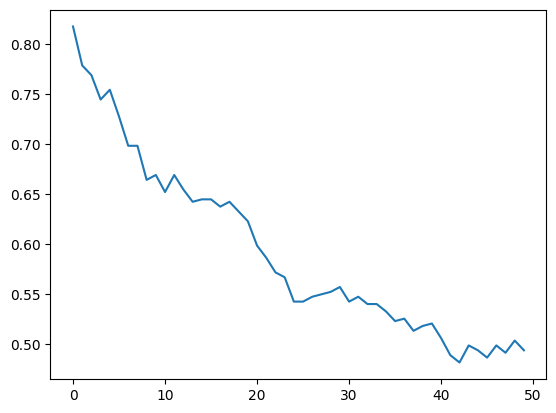

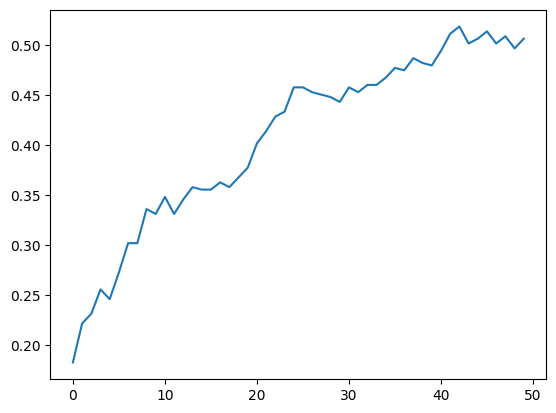

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
acc_lst=[]
er_lst=[]
for i in range(1,51):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train_sc,y_train)
  err=1-knn.score(x_test_sc,y_test)
  er_lst.append(err)
  acc_lst.append(accuracy_score(y_test,knn.predict(x_test_sc)))
plt.plot(acc_lst)
plt.show()
plt.plot(er_lst)
plt.show()

In [36]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_sc,y_train)
y_pred_train=knn.predict(x_train_sc)
y_pred_test=knn.predict(x_test_sc)
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       326
           1       0.79      0.68      0.73       314
           2       0.81      0.86      0.84       339
           3       0.83      0.84      0.83       333
           4       0.87      0.99      0.93       332

    accuracy                           0.83      1644
   macro avg       0.83      0.83      0.83      1644
weighted avg       0.83      0.83      0.83      1644

              precision    recall  f1-score   support

           0       0.73      0.66      0.69        85
           1       0.78      0.58      0.66        97
           2       0.67      0.74      0.70        72
           3       0.76      0.85      0.80        78
           4       0.82      1.00      0.90        79

    accuracy                           0.75       411
   macro avg       0.75      0.76      0.75       411
weighted avg       0.75      0.75      0.75       411



In [37]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train_sc,y_train)
y_pred_train=svm.predict(x_train_sc)
y_pred_test=svm.predict(x_test_sc)
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       326
           1       0.84      0.67      0.75       314
           2       0.70      0.81      0.75       339
           3       0.78      0.77      0.78       333
           4       0.80      0.90      0.85       332

    accuracy                           0.80      1644
   macro avg       0.80      0.80      0.80      1644
weighted avg       0.80      0.80      0.80      1644

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        85
           1       0.78      0.55      0.64        97
           2       0.56      0.65      0.60        72
           3       0.66      0.73      0.69        78
           4       0.72      0.80      0.75        79

    accuracy                           0.70       411
   macro avg       0.70      0.70      0.69       411
weighted avg       0.71      0.70      0.69       411



In [38]:
#here KNN with value 5 has performed better than the SVM, while the decision tree is overfitting, and randomforest is also overfitting.

In [39]:
# so we will perform hyperparameter tunning on the SVM model
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : [0.01,0.1, 0.5, 1, 5],
'kernel' : ['linear','rbf', 'poly', 'sigmoid']}
gc=GridSearchCV(estimator=SVC(),param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)
gc.fit(x_train_sc,y_train)
y_pred_train=gc.predict(x_train_sc)
y_pred_test=gc.predict(x_test_sc)
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))
print(gc.best_params_)
print(gc.best_score_)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       326
           1       0.92      0.80      0.85       314
           2       0.87      0.94      0.90       339
           3       0.90      0.93      0.91       333
           4       0.96      0.99      0.98       332

    accuracy                           0.92      1644
   macro avg       0.92      0.91      0.91      1644
weighted avg       0.92      0.92      0.91      1644

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        85
           1       0.78      0.61      0.68        97
           2       0.72      0.76      0.74        72
           3       0.74      0.82      0.78        78
           4       0.87      0.96      0.92        79

    accuracy                           0.78       411
   macro avg       0.77      0.78      0.78       411
weighted avg       0.78      0.78      0.77       411

{'C': 5, 'kernel': 'rb

In [ ]:
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100]
}
gc = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gc.fit(x_train_sc, y_train)
y_pred_train = gc.best_estimator_.predict(x_train_sc)
y_pred_test = gc.best_estimator_.predict(x_test_sc)

print("Training Classification Report:\n", classification_report(y_train, y_pred_train))
print("Testing Classification Report:\n", classification_report(y_test, y_pred_test))
print("Best Parameters found: ", gc.best_params_)
print("Best Cross-Validation Score: ", gc.best_score_)